In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
df = pd.read_csv("/content/Netflix Dataset.csv")
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [13]:
print("The Shape of the dataset:",df.shape)

The Shape of the dataset: (7789, 11)


In [14]:
print("No.of Rows in the dataset:",df.shape[0])

No.of Rows in the dataset: 7789


In [15]:
print("No.of Columns in the dataset:",df.shape[1])

No.of Columns in the dataset: 11


In [16]:
df.describe()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
count,7789,7789,7789,5401,7071,7282,7779,7782,7789,7789,7789
unique,7787,2,7787,4050,6831,681,1565,14,216,492,7769
top,s6621,Movie,The Lost Okoroshi,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,2,5379,2,18,18,2556,118,2865,1608,334,3


In [17]:
print("Nulls present in the dataset column wise")
df.isnull().sum()

Nulls present in the dataset column wise


,0
Show_Id,0
Category,0
Title,0
Director,2388
Cast,718
Country,507
Release_Date,10
Rating,7
Duration,0
Type,0


In [18]:
print("Total No.of Nulls present in the dataset:",df.isnull().sum().sum())

Total No.of Nulls present in the dataset: 3630


In [19]:
print("===== Dataset Info =====")
print(df.info())
print("\n===== Missing Values =====")
print(df.isnull().sum())
print("\n===== First 5 Rows =====")
print(df.head())

===== Dataset Info =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB
None

===== Missing Values =====
Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

=

In [20]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['Year'] = df['Release_Date'].dt.year
df['Country'] = df['Country'].fillna("Unknown")
df['Director'] = df['Director'].fillna("Unknown")
df['Cast'] = df['Cast'].fillna("Unknown")

In [21]:
print("\n===== Category Distribution =====")
print(df['Category'].value_counts())
print("\n===== Rating Distribution =====")
print(df['Rating'].value_counts())
print("\n===== Country (Top 10) =====")
print(df['Country'].value_counts().head(10))


===== Category Distribution =====
Category
Movie      5379
TV Show    2410
Name: count, dtype: int64

===== Rating Distribution =====
Rating
TV-MA       2865
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: count, dtype: int64

===== Country (Top 10) =====
Country
United States     2556
India              923
Unknown            507
United Kingdom     397
Japan              226
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Name: count, dtype: int64


/tmp/ipython-input-2353757182.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Category', palette='coolwarm')


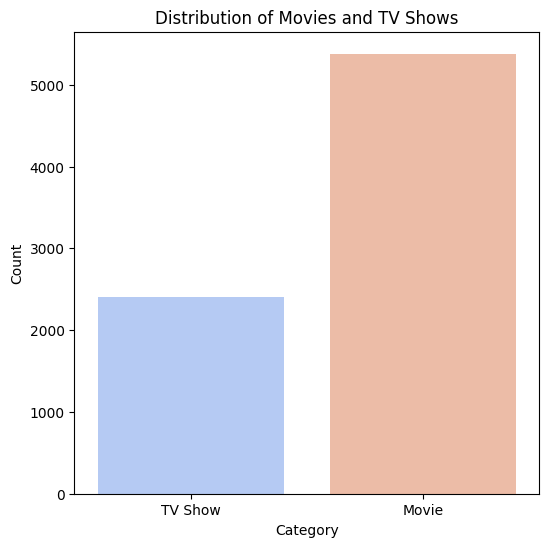

In [22]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='Category', palette='coolwarm')
plt.title("Distribution of Movies and TV Shows")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-3988570859.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')


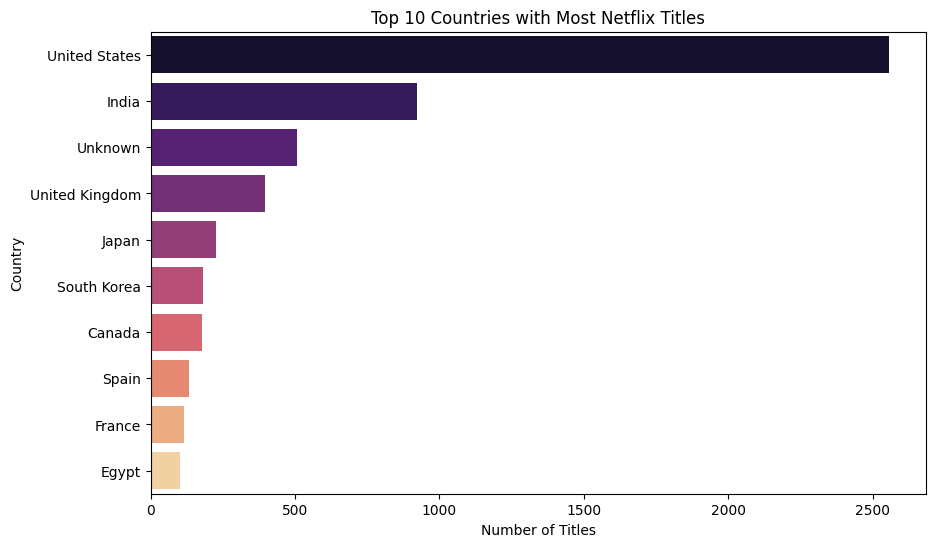

In [23]:
top_countries = df['Country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')
plt.title("Top 10 Countries with Most Netflix Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

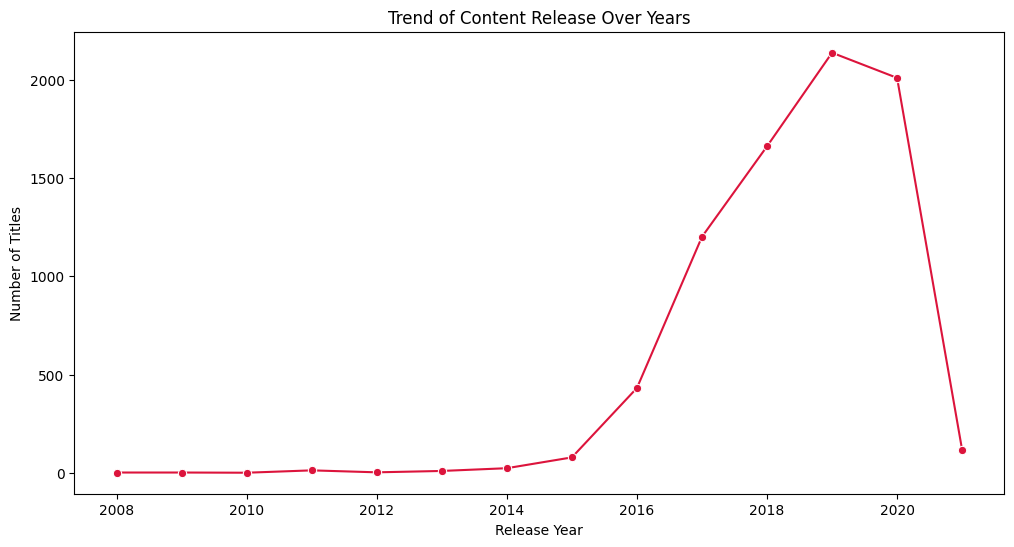

In [24]:
yearly = df['Year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly.index, y=yearly.values, marker='o', color='crimson')
plt.title("Trend of Content Release Over Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.show()

/tmp/ipython-input-1151364112.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='cubehelix')


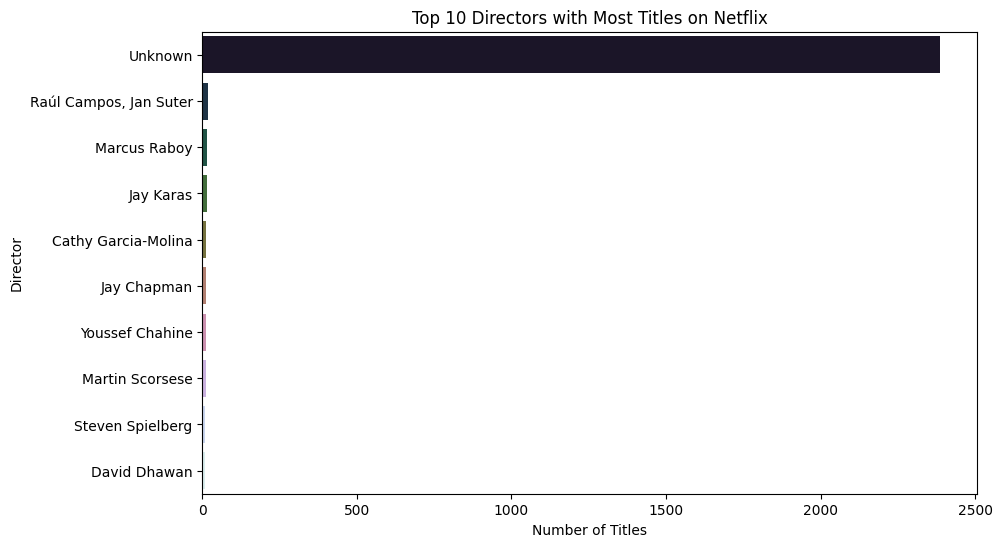

In [25]:
top_directors = df['Director'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='cubehelix')
plt.title("Top 10 Directors with Most Titles on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()

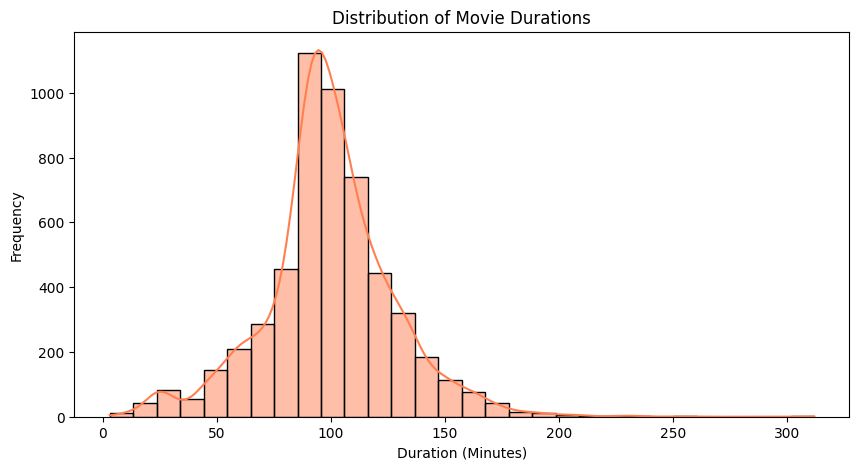

In [27]:
plt.figure(figsize=(10, 5))
sns.histplot(movie_df['Minutes'], bins=30, kde=True, color='coral')
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Frequency")
plt.show()

/tmp/ipython-input-2162331874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_df['Seasons'] = tv_df['Duration'].str.replace(' Season', '').str.replace('s', '', regex=False)
/tmp/ipython-input-2162331874.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_df['Seasons'] = pd.to_numeric(tv_df['Seasons'], errors='coerce')
/tmp/ipython-input-2162331874.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set 

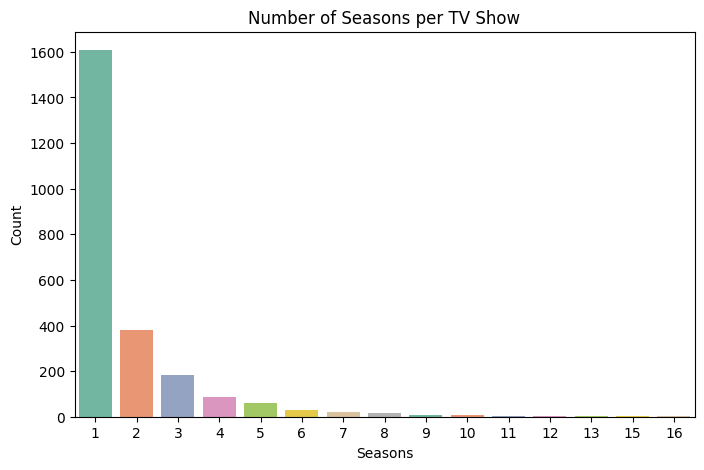

In [28]:
tv_df = df[df['Category'] == 'TV Show']
tv_df['Seasons'] = tv_df['Duration'].str.replace(' Season', '').str.replace('s', '', regex=False)
tv_df['Seasons'] = pd.to_numeric(tv_df['Seasons'], errors='coerce')

plt.figure(figsize=(8, 5))
sns.countplot(x=tv_df['Seasons'], palette='Set2')
plt.title("Number of Seasons per TV Show")
plt.xlabel("Seasons")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-431176252.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='Blues')


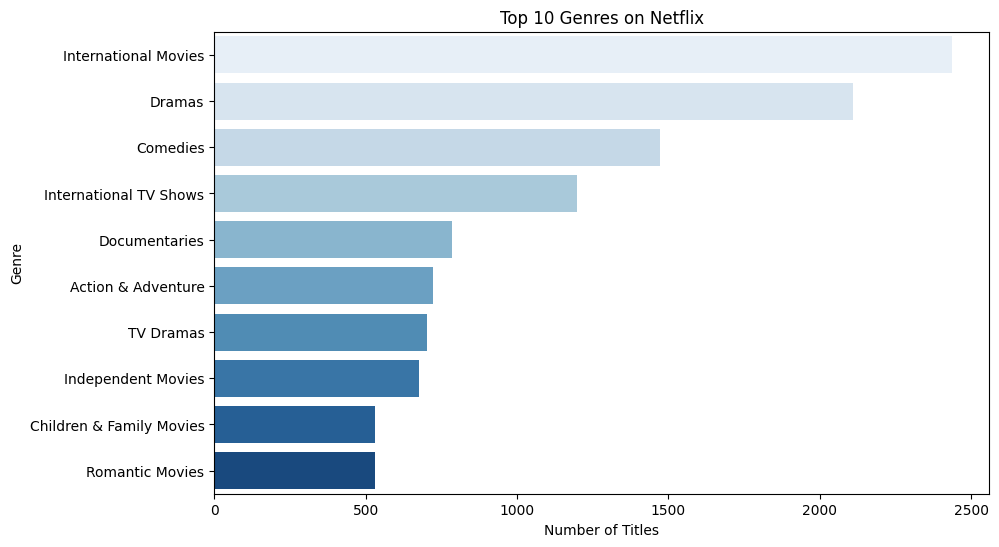

In [29]:
genres = df['Type'].str.split(',').explode().str.strip()
top_genres = genres.value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='Blues')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()
